# <font color="#00956B"> EARTHQUAKE ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
%matplotlib inline

In [3]:
data=pd.read_csv("Eartquakes.csv")

In [4]:
data.head()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


In [5]:
data.rename(columns={"magnitudo":"Magnitude"},inplace=True)

In [6]:
data.columns

Index(['time', 'place', 'status', 'tsunami', 'significance', 'data_type',
       'Magnitude', 'state', 'longitude', 'latitude', 'depth', 'date'],
      dtype='object')

In [7]:
data.head()

,time,place,status,tsunami,significance,data_type,Magnitude,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   Magnitude     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB


In [9]:
data.shape

(3445751, 12)

In [10]:
print(f"Before deleting duplicates:{len(data[data.duplicated()])}")

Before deleting duplicates:16869


In [11]:
data.drop_duplicates(inplace=True)

In [12]:
print(f"After deleting duplicates:{len(data[data.duplicated()])}")

After deleting duplicates:0


# <font color="Orange">Deleted all the duplicates

In [13]:
data.isnull().sum()

time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
Magnitude       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64

# <font color="orange"> There is no null values

In [14]:
data["data_type"].nunique()

25

In [15]:
data["data_type"].unique()

array(['earthquake', 'quarry blast', 'explosion', 'other event',
       'nuclear explosion', 'rock burst', 'ice quake',
       'chemical explosion', 'sonic boom', 'mine collapse', 'rockslide',
       'Rock Slide', 'accidental explosion', 'landslide', 'quarry',
       'mining explosion', 'acoustic noise', 'not reported',
       'experimental explosion', 'collapse', 'meteorite',
       'induced or triggered event', 'volcanic eruption', 'Ice Quake',
       'snow avalanche'], dtype=object)

In [16]:
data.describe(include="object")

,place,status,data_type,state,date
count,3428882,3428882,3428882,3428882,3428882
unique,531130,6,25,858,3428775
top,"6 km W of Cobb, California",reviewed,earthquake,California,2023-02-27 16:56:26.480000+00:00
freq,24088,3209021,3345360,862679,2


In [17]:
data["state"].nunique()

858

In [18]:
data.describe()

,time,tsunami,significance,Magnitude,longitude,latitude,depth
count,3.428882e+06,3.428882e+06,3.428882e+06,3.428882e+06,3.428882e+06,3.428882e+06,3.428882e+06
mean,1.247118e+12,4.424183e-04,7.400236e+01,1.773933e+00,-1.012787e+02,3.746733e+01,2.285096e+01
std,2.975887e+11,2.102909e-02,1.016332e+02,1.291012e+00,7.698497e+01,2.040831e+01,5.484797e+01
min,6.311534e+11,0.000000e+00,0.000000e+00,-9.990000e+00,-1.799997e+02,-8.442200e+01,-1.000000e+01
25%,1.024409e+12,0.000000e+00,1.300000e+01,9.100000e-01,-1.464195e+02,3.406400e+01,3.120000e+00
50%,1.282329e+12,0.000000e+00,3.300000e+01,1.460000e+00,-1.189527e+02,3.793420e+01,7.700000e+00
75%,1.508620e+12,0.000000e+00,8.100000e+01,2.300000e+00,-1.159280e+02,4.784117e+01,1.611100e+01
max,1.690629e+12,1.000000e+00,2.910000e+03,9.100000e+00,1.800000e+02,8.738600e+01,7.358000e+02


In [19]:
data.state=data.state.str.replace(" California","California")

# <font color="green"> Countries with most number of Earthquakes.

In [20]:
state_counts=data["state"].value_counts()
state_counts.head(20)

California           1351682
 Alaska               773901
 Nevada               173483
 Hawaii               124679
 Washington            80111
 Utah                  55168
 Montana               53167
 Indonesia             48282
 Puerto Rico           46055
 Chile                 36838
 Greece                30286
 B.C.                  29883
 Japan                 28800
 Oklahoma              24944
 Papua New Guinea      22912
 Italy                 18539
 Philippines           17727
 Oregon                17593
 Mexico                16479
 Turkey                15885
Name: state, dtype: int64

In [21]:
data[data["Magnitude"]>5].sort_values(by="Magnitude",ascending=False)[:5]

,time,place,status,tsunami,significance,data_type,Magnitude,state,longitude,latitude,depth,date
1779203,1299822384120,"2011 Great Tohoku Earthquake, Japan",reviewed,0,2184,earthquake,9.1,Japan,142.373,38.297,29.0,2011-03-11 05:46:24.120000+00:00
1135418,1104022733450,2004 Sumatra - Andaman Islands Earthquake,reviewed,0,1274,earthquake,9.1,2004 Sumatra - Andaman Islands Earthquake,95.982,3.295,30.0,2004-12-26 00:58:53.450000+00:00
1671250,1267252451530,"36 km WNW of Quirihue, Chile",reviewed,0,1991,earthquake,8.8,Chile,-72.898,-36.122,22.9,2010-02-27 06:34:11.530000+00:00
1896589,1334133516720,off the west coast of northern Sumatra,reviewed,0,2048,earthquake,8.6,off the west coast of northern Sumatra,93.063,2.327,20.0,2012-04-11 08:38:36.720000+00:00
1162762,1112026176530,"78 km WSW of Singkil, Indonesia",reviewed,0,1138,earthquake,8.6,Indonesia,97.108,2.085,30.0,2005-03-28 16:09:36.530000+00:00


# <font color="Green"> Converting date to different formats

In [22]:
data["date"]=pd.to_datetime(data["date"])

In [23]:
def transform(data):
    data["hour"]=data.date.dt.hour
    data["dateofmonth"]=data.date.dt.day
    data["dayname"]=data.date.dt.day_name()
    data["month"]=data.date.dt.month
    data["monthname"]=data.date.dt.month_name()
    data["year"]=data.date.dt.year
    return data
data=transform(data)

In [24]:
data.head()

,time,place,status,tsunami,significance,data_type,Magnitude,state,longitude,latitude,depth,date,hour,dateofmonth,dayname,month,monthname,year
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00,0,1,Monday,1,January,1990
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00,0,1,Monday,1,January,1990
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00,0,1,Monday,1,January,1990
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00,0,1,Monday,1,January,1990
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00,1,1,Monday,1,January,1990


In [25]:
eq_year_freq=data.groupby("year").size()
avg_mag=data.groupby("year")["Magnitude"].mean()

# <font color="blue">What is the Earthquake Frequency and Average Magnitude Over the Years?

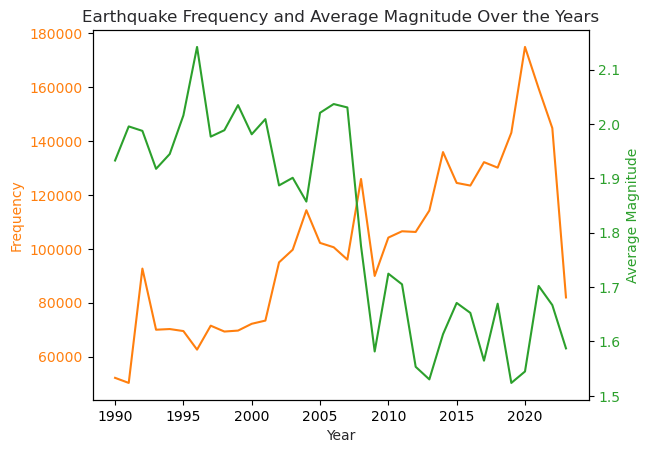

In [26]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Year',color="#28282B")
ax1.set_ylabel('Frequency', color='tab:orange')
ax1.plot(eq_year_freq.index, eq_year_freq.values, color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')
ax2 = ax1.twinx()
ax2.set_ylabel('Average Magnitude', color='tab:green')
ax2.plot(avg_mag.index, avg_mag.values, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
plt.title('Earthquake Frequency and Average Magnitude Over the Years',color="#28282B")
plt.show()

In [27]:
data['Season'] = pd.cut(data['date'].dt.month, bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Fall'])
eq_month_freq = data.groupby('month').size()
eq_freq_seas = data.groupby('Season').size()

# <font color="blue">What is the Monthly distribution of Earthquakes in the dataset?

In [28]:
def generate_random_colors(num_colors):
    return sns.color_palette("Blues", n_colors=num_colors)

random_colors = generate_random_colors(12)

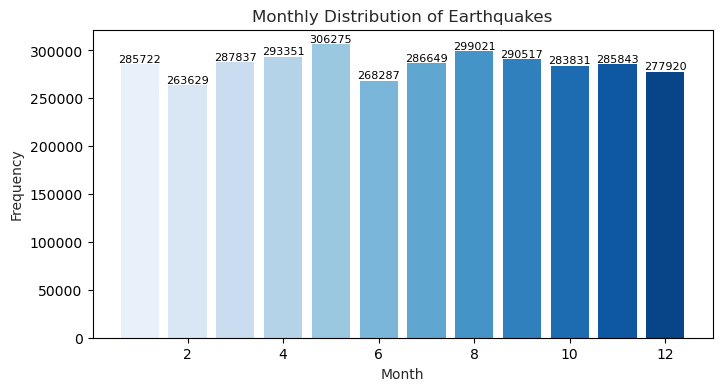

In [29]:
plt.figure(figsize=(8,4))
bars=plt.bar(eq_month_freq.index, eq_month_freq.values,color=generate_random_colors(12))
plt.xlabel('Month',color="#28282B")
plt.ylabel('Frequency',color="#28282B")
plt.title('Monthly Distribution of Earthquakes',color="#28282B")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)
plt.show()

# <font color="blue">What is the Seasonal distribution of earthquakes in the dataset?

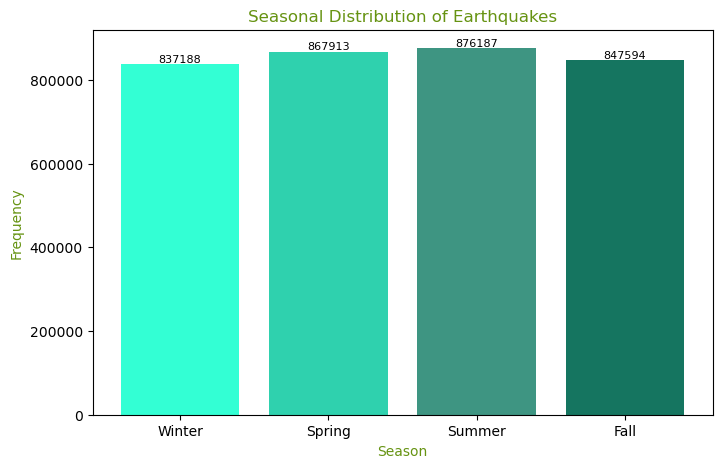

In [30]:
plt.figure(figsize=(8, 5))
bars=plt.bar(eq_freq_seas.index,eq_freq_seas.values, color=["#33FFD4","#2FD1AE","#3E9582","#157560"])
plt.xlabel('Season',color="#669312")
plt.ylabel('Frequency',color="#669312")
plt.title('Seasonal Distribution of Earthquakes',color="#669312")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)
plt.show()

# <font color="blue">What is the distribution of earthquake magnitudes in the dataset?

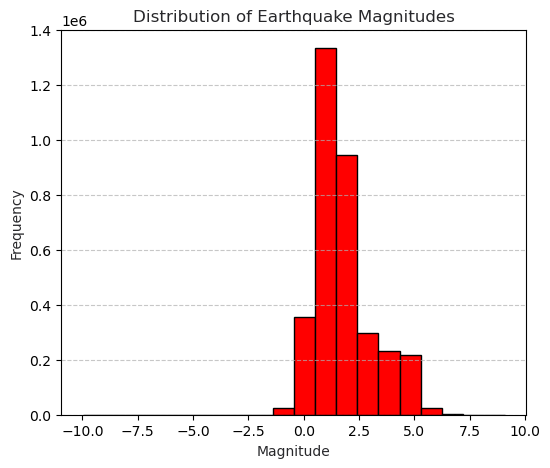

In [31]:
plt.figure(figsize=(6,5))
plt.hist(data["Magnitude"],bins=20,color="#FF0000",edgecolor="black")
plt.ylabel("Frequency",color="#28282B")
plt.xlabel("Magnitude",color="#28282B")
plt.title("Distribution of Earthquake Magnitudes",color="#28282B")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# <font color="blue"> Which regions have the highest frequency of earthquakes?

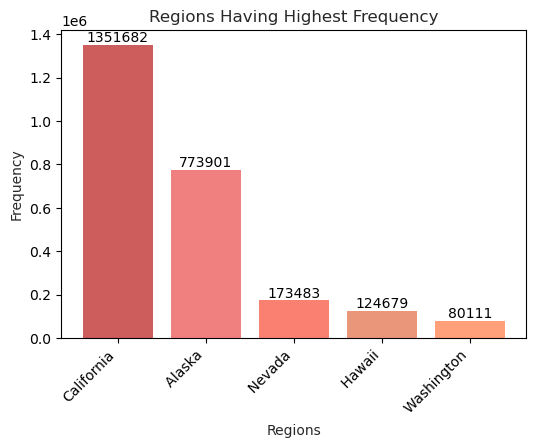

In [32]:
top=state_counts.head(5)
plt.figure(figsize=(6,4))
bars=plt.bar(top.index,top.values,color=["#CD5C5C","#F08080","#FA8072","#E9967A","#FFA07A"])
plt.xlabel("Regions",color="#28282B")
plt.ylabel("Frequency",color="#28282B")
plt.title("Regions Having Highest Frequency",color="#28282B")
plt.xticks(rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)
plt.show()

# <font color="blue"> Is there a correlation between the depth of earthquake epicenters and their magnitudes?

In [33]:
data.corr(numeric_only=True)

,time,tsunami,significance,Magnitude,longitude,latitude,depth,hour,dateofmonth,month,year
time,1.000000,0.018769,-0.079838,-0.119304,-0.118947,0.105528,0.031864,-0.011111,-0.004277,-0.007271,0.999538
tsunami,0.018769,1.000000,0.093062,0.057099,0.005822,-0.001077,0.009384,0.000180,-0.000443,-0.000399,0.018769
significance,-0.079838,0.093062,1.000000,0.939363,0.651277,-0.556760,0.363182,0.013578,0.001448,-0.003951,-0.079668
Magnitude,-0.119304,0.057099,0.939363,1.000000,0.590907,-0.494314,0.356965,0.019506,0.000945,-0.001425,-0.119182
longitude,-0.118947,0.005822,0.651277,0.590907,1.000000,-0.457588,0.171621,0.009116,0.004898,-0.006105,-0.118692
latitude,0.105528,-0.001077,-0.556760,-0.494314,-0.457588,1.000000,-0.236421,-0.005647,0.000306,0.010419,0.105140
depth,0.031864,0.009384,0.363182,0.356965,0.171621,-0.236421,1.000000,-0.001898,0.000987,-0.003890,0.031958
hour,-0.011111,0.000180,0.013578,0.019506,0.009116,-0.005647,-0.001898,1.000000,0.002107,0.001007,-0.011221
dateofmonth,-0.004277,-0.000443,0.001448,0.000945,0.004898,0.000306,0.000987,0.002107,1.000000,0.002320,-0.006850
month,-0.007271,-0.000399,-0.003951,-0.001425,-0.006105,0.010419,-0.003890,0.001007,0.002320,1.000000,-0.037561


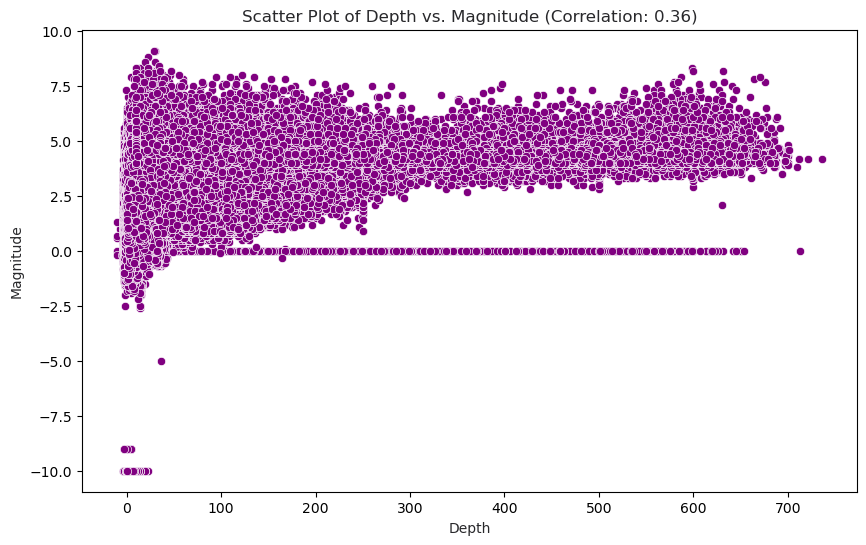

In [34]:
depth_magnitude_data = data[['depth', 'Magnitude']]


correlation_coefficient = depth_magnitude_data['depth'].corr(depth_magnitude_data['Magnitude'])


plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='Magnitude', data=depth_magnitude_data, color='purple')
plt.title(f'Scatter Plot of Depth vs. Magnitude (Correlation: {correlation_coefficient:.2f})',color="#28282B")
plt.xlabel('Depth',color="#28282B")
plt.ylabel('Magnitude',color="#28282B")
plt.show()